In [1]:
import pandas as pd
from pandas import DataFrame, Series
from konlpy.tag import *
import konlpy

import soynlp
from soynlp.word import WordExtractor

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import Counter

In [2]:
raw = pd.read_csv('Data/Clien/Clien_IPhone_10264.csv', encoding = 'cp949')
#raw.drop('Unnamed: 0', axis = 1, inplace= True)

In [3]:
raw.head()

,A
0,가끔 어떤이유인지 사진과 같이 화면이 살짝 하단으로 내려오는데 이게 뭔지 모르겠습니...
1,배터리 스팩만 비교하면 Xr이 xs max 대비 맞장뜰것 같고... 변강쇠 8플 보...
2,아이폰7에서 X로 바꾼지 3주 정도 됐는데 다 만족스럽지만 각 사이트 로그인 할때 ...
3,자가개통할려고하니 본인명의 신용카드가없어서 개통이안되어서 대리점가서 해달라고했더...
4,그동안 미밴드3 한글화 기다리다가 한글화도 잘 되어 있고 액정도 더 큰 어메이즈핏빕...


In [59]:
len(raw)

10260

In [45]:
review_list = [x.replace('/', '') for x in raw.iloc[:,0]]

review_list = [x.replace(',', '') for x in review_list]

review_list = [x.replace('!', '') for x in review_list]
review_list = [x.replace('?', '') for x in review_list]
review_list = [x.replace('.', '') for x in review_list]
review_list = [x.replace('ㅎ', '') for x in review_list]
review_list = [x.replace('ㅋ', '') for x in review_list]
review_list = [x.replace('ㅠ', '') for x in review_list]
review_list = [x.replace('ㅜ', '') for x in review_list]
review_list = [x.replace('ㅡ', '') for x in review_list]
review_list = [x.replace('생각', '') for x in review_list]
review_list = [x.replace('사용', '') for x in review_list]
review_list = [x.replace('정도', '') for x in review_list]
review_list = [x.replace('정말', '') for x in review_list]
review_list = [x.replace('그냥', '') for x in review_list]
review_list = [x.replace('진짜', '') for x in review_list]
review_list = [x.replace('지금', '') for x in review_list]
review_list = [x.replace('때문', '') for x in review_list]
review_list = [x.replace('혹시', '') for x in review_list]
review_list = [x.replace('이번', '') for x in review_list]
review_list = [x.replace('오늘', '') for x in review_list]
review_list = [x.replace('다시', '') for x in review_list]
review_list = [x.replace('하나', '') for x in review_list]
review_list = [x.replace('가끔', '') for x in review_list]
review_list = [x.replace('약간', '') for x in review_list]
review_list = [x.replace('뭔가', '') for x in review_list]
review_list = [x.replace('조금', '') for x in review_list]
review_list = [x.replace('그게', '') for x in review_list]
review_list = [x.replace('아주', '') for x in review_list]
review_list = [x.replace('크게', '') for x in review_list]


In [5]:
twit = Twitter()

temp_nouns = twit.nouns(' '.join(review_list))
nouns = [x for x in temp_nouns if len(x) > 1]

print(len(nouns))
len(set(nouns))

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


74488


7858

In [6]:
temp_morphs = twit.morphs(' '.join(review_list))
morphs = [x for x in temp_morphs if len(x) > 1]

print(len(morphs))
len(set(morphs))

155958


25545

In [8]:
counter = Counter(nouns)
counter.most_common(20)

[('아이폰', 1096),
 ('애플', 723),
 ('워치', 491),
 ('구매', 449),
 ('문제', 426),
 ('가격', 393),
 ('모델', 374),
 ('화면', 362),
 ('사진', 341),
 ('카메라', 316),
 ('케이스', 300),
 ('한국', 297),
 ('리퍼', 289),
 ('미국', 273),
 ('설정', 271),
 ('가요', 268),
 ('배터리', 264),
 ('고민', 254),
 ('배송', 252),
 ('맥스', 251)]

In [11]:
counter = Counter(morphs)
counter.most_common(30)

[('에서', 1650),
 ('으로', 1581),
 ('아이폰', 1096),
 ('입니다', 945),
 ('Vollago', 856),
 ('하고', 783),
 ('애플', 723),
 ('감사합니다', 675),
 ('합니다', 653),
 ('ㅎㅎ', 640),
 ('해서', 555),
 ('인데', 537),
 ('하는', 497),
 ('워치', 491),
 ('구매', 450),
 ('하면', 436),
 ('문제', 426),
 ('가격', 393),
 ('됩니다', 377),
 ('모델', 374),
 ('있습니다', 373),
 ('까지', 371),
 ('화면', 362),
 ('사진', 341),
 ('너무', 333),
 ('카메라', 316),
 ('다른', 314),
 ('아직', 313),
 ('이라', 310),
 ('했는데', 310)]

# 워드클라우드 만들기

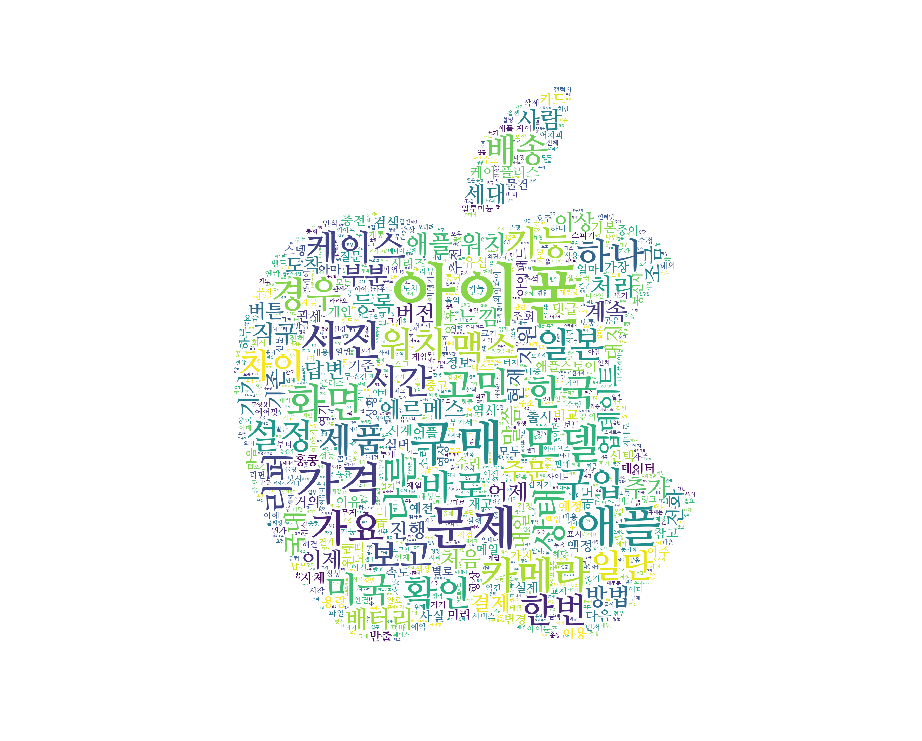

In [23]:
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

img_mask = np.array(Image.open('apple.jpg'))
plt.figure(figsize = (18,13))
fontsize = 200

word_cloud = WordCloud(background_color = 'white',
                       font_path = font_path,
                       mask = img_mask,
                       max_words = 1000,
                       max_font_size= fontsize,
                      )

wc = word_cloud.generate(' '.join(temp_nouns))

plt.imshow(wc)
plt.axis('off')
plt.show()

# Word2Vec 임베딩

In [46]:
def preprocessing(ls):
        
    total_ls = []
    
    # ls는 하나의 게시글을 개별 값으로 담고있는 리스트이다.
    twit = Twitter()
    
    for review in review_list:
        noun_ls = twit.nouns(review)
        
        total_ls += [[x for x in noun_ls if len(x) > 1]]
        
    return total_ls

In [47]:
sentences = preprocessing(review_list)

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [48]:
len(sentences)

10260

In [49]:
from gensim.models import word2vec

In [50]:
# 파라미터 값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 50 # 최소 문자 수
num_workers =4 # 병렬 처리 스레드 수
context = 10 # 문자열의 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

model = word2vec.Word2Vec(sentences,
                          workers = num_workers,
                          size = num_features,
                          min_count = min_word_count,
                          window = context,
                          sample = downsampling,
                          iter = 30
                         )

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "%sfeatures_%sminwords_%scontext"%(num_features, min_word_count, context)
model.save(model_name)

# Exploring the Model Results
# 모델 결과 탐색


In [51]:
# 가장 유사한 단어 추출
model.wv.most_similar('카메라')

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('갤럭시', 0.7207285165786743),
 ('성능', 0.6892388463020325),
 ('노트', 0.6608948707580566),
 ('차이', 0.6536163687705994),
 ('리뷰', 0.6280439496040344),
 ('동영상', 0.6155346035957336),
 ('해상도', 0.594098687171936),
 ('무음', 0.5850223302841187),
 ('이건', 0.5721240043640137),
 ('사진', 0.5672729015350342)]

# Word2Vec으로 벡터화 한 단어를 t-SNE를 통해 시각화

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim
import matplotlib as mpl
import seaborn as sns
sns.set()
from matplotlib import font_manager, rc

font_location = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# 그래프에서 마이너스 폰트 꺠지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [53]:


model_name = "%sfeatures_%sminwords_%scontext"%(num_features, min_word_count, context)
model = gensim.models.Doc2Vec.load(model_name)

In [ ]:
vocab = [x for x in model.wv.vocab]


In [54]:
vocab = [x for x in model.wv.vocab]
print(len(vocab))

341


In [55]:
X = model[vocab]

# n_components는 차원의 수
tsne = TSNE(n_components = 2)

X_tsne = tsne.fit_transform(X)

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [56]:
df = pd.DataFrame(X_tsne, index = vocab, columns = ['x','y'])
df.shape

(341, 2)

In [57]:
df.head()

,x,y
이유,6.826359,-0.996850
사진,3.604870,20.577951
화면,4.599478,6.686576
배터리,8.670800,-1.846875
비교,0.076285,0.555378


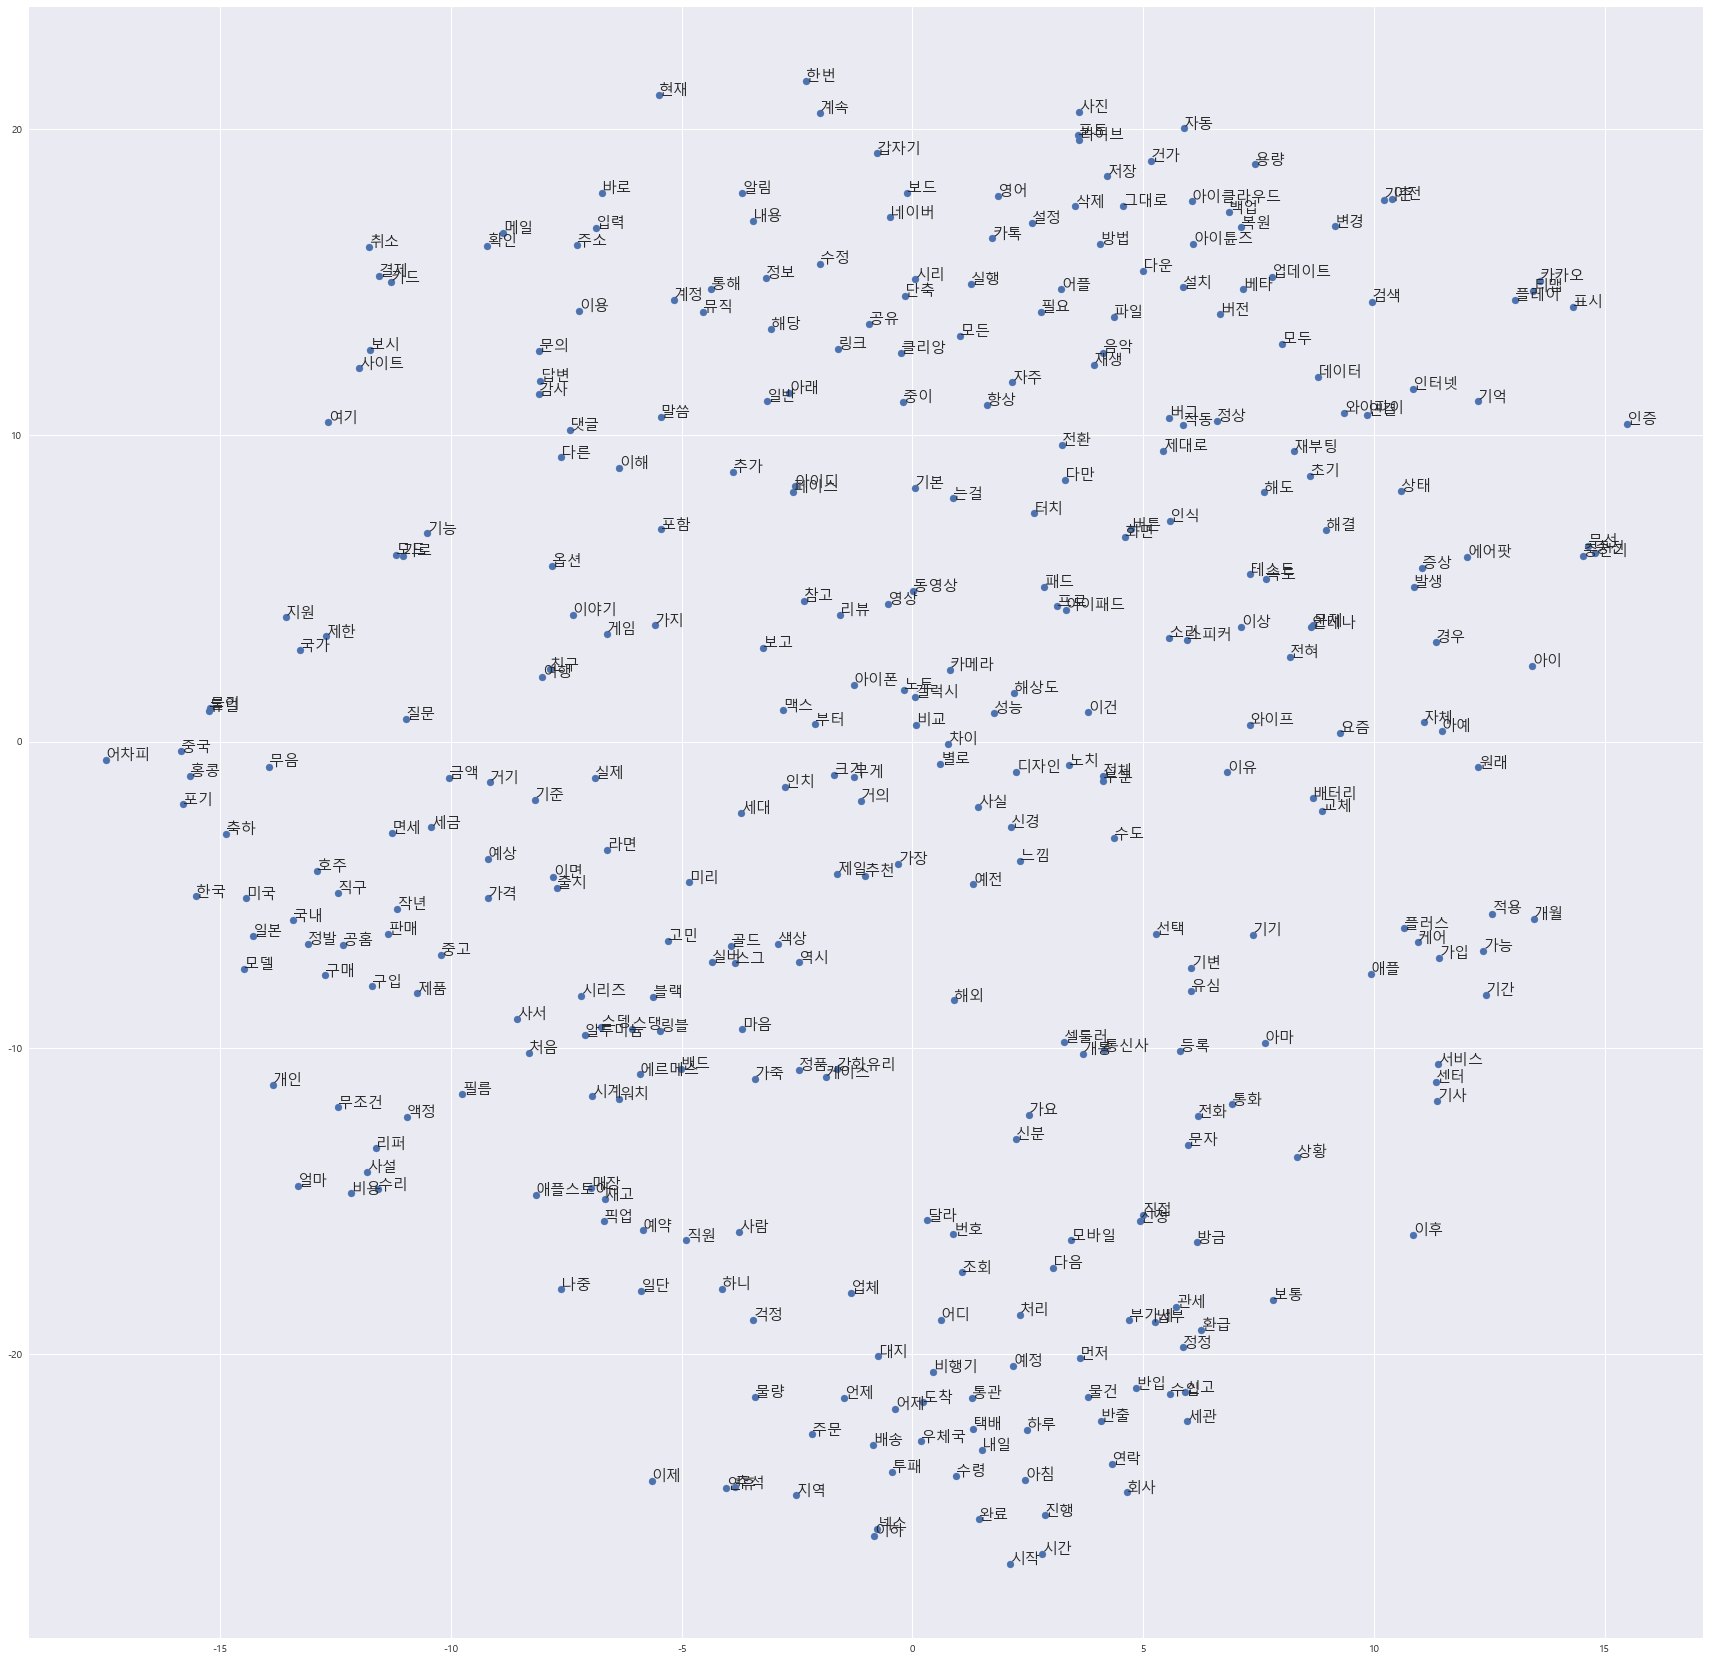

In [58]:
plt.figure(figsize = (30,30))

plt.scatter(df['x'].values, df['y'].values)

for words, pos in df.iterrows():
    plt.annotate(words, pos, fontsize = 15)